In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

### Loading Dataset

In [2]:
df1 = pd.read_csv("./mushrooms.csv")
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
label_encoder = LabelEncoder()

# Selecting columns for encoding (all except one column)
columns_to_encode = df1.columns[df1.columns != 'class']


for column in columns_to_encode:
    if df1[column].dtype == 'object':
        df1[column] = label_encoder.fit_transform(df1[column])

# Display the encoded DataFrame
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,e,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,e,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,p,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,e,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [4]:
column_names = df1.columns
print(column_names)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [5]:
X1 = df1.drop('class', axis=1)
y1 = df1['class']
feature_columns = ["cap-shape","cap-surface", "cap-color", "bruises","odor","gill-attachment", "gill-spacing","gill-size","gill-color","stalk-shape", "stalk-root", "stalk-surface-above-ring","stalk-surface-below-ring",
                    "stalk-color-above-ring","stalk-color-below-ring", "veil-type", "veil-color", "ring-number","ring-type", "spore-print-color", "population", "habitat"]
scaler = MinMaxScaler(feature_range=(0, 1))
X_normalized = scaler.fit_transform(X1)
df = pd.DataFrame(X_normalized,columns=feature_columns)
df.index = df1.index
df['class'] = df1['class']
X = df.drop('class', axis=1)
y = df['class']
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636,0.0,...,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333,p
1,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,0.0,...,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.166667,e
2,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,0.0,...,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.500000,e
3,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,0.0,...,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333,p
4,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636,1.0,...,0.875,0.875,0.0,0.666667,0.5,0.0,0.375,0.0,0.166667,e


### Defining tree_sweep function below

In [6]:
def tree_sweep(train, test, 
               size = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
               purity = [60, 65, 70, 75, 80, 85, 90, 95]):
    
    result = []
    
    for s in size:
        for p in purity:
            dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=s, min_impurity_decrease=(100-p)/100)
            dt.fit(train.iloc[:, :-1], train.iloc[:, -1])
            train_pred = dt.predict(train.iloc[:, :-1])
            test_pred = dt.predict(test.iloc[:, :-1])
            train_acc = accuracy_score(train.iloc[:, -1], train_pred)
            test_acc = accuracy_score(test.iloc[:, -1], test_pred)
            result.append([s, p, train_acc, test_acc])

    result_df = pd.DataFrame(result, columns=['size', 'purity', 'training-accuracy', 'test-accuracy'])
    result_df.to_csv('tree_sweep.csv', index=False)


In [7]:

# Splitting the dataset into training and testing sets
train, test = train_test_split(df, test_size=0.3, random_state=42)


In [10]:
# Calling the function to perform parameter sweep and generate CSV
tree_sweep(train, test)

### Find the most optimal tree among these with highest test-accuracy

In [11]:
from sklearn.model_selection import GridSearchCV

def find_optimal_tree(train, test):
    param_grid = {
        'min_samples_split': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'min_impurity_decrease': [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
    }

    clf = DecisionTreeClassifier()
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(train.iloc[:, :-1], train.iloc[:, -1])

    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)

    # Evaluate on the test set
    best_model = grid_search.best_estimator_
    test_accuracy = best_model.score(test.iloc[:, :-1], test.iloc[:, -1])
    print("Test accuracy of the best model:", test_accuracy)

    return best_model


In [12]:
#Call the above function with train and test data
best_model = find_optimal_tree(train, test)

Best parameters: {'min_impurity_decrease': 0.6, 'min_samples_split': 10}
Best cross-validation score: 0.5189939609214271
Test accuracy of the best model: 0.5155865463494668


### Generating the Rules from the optimal tree for the two classes

In [25]:
def print_decision_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != -2 else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node):
        if tree_.feature[node] != -2:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"If {name} <= {threshold}:")
            recurse(tree_.children_left[node])
            print(f"Else (If {name} > {threshold}):")
            recurse(tree_.children_right[node])
        else:
            print(f"Class: {class_names[tree_.value[node].argmax()]}")

    recurse(0)


In [26]:
# Calling the above defined function with the best_model obtained from previous step
print_decision_rules(best_model, feature_names=train.iloc[:, :-1].columns, class_names=['h', 'g'])

Class: h


### For the optimal value of size, plot purity vs. train/test accuracy curves

In [27]:
def plot_purity_vs_accuracy(train_X, train_y, test_X, test_y, optimal_size):
    purity_values = [60, 65, 70, 75, 80, 85, 90, 95]
    train_accuracies = []
    test_accuracies = []

    for purity in purity_values:
        clf = DecisionTreeClassifier(min_samples_split=optimal_size, min_impurity_decrease=(100 - purity) / 100)
        clf.fit(train_X, train_y)
        train_accuracy = clf.score(train_X, train_y)
        test_accuracy = clf.score(test_X, test_y)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    plt.plot(purity_values, train_accuracies, label='Train Accuracy')
    plt.plot(purity_values, test_accuracies, label='Test Accuracy')
    plt.xlabel('Purity')
    plt.ylabel('Accuracy')
    plt.title('Purity vs. Train/Test Accuracy')
    plt.legend()
    plt.show()


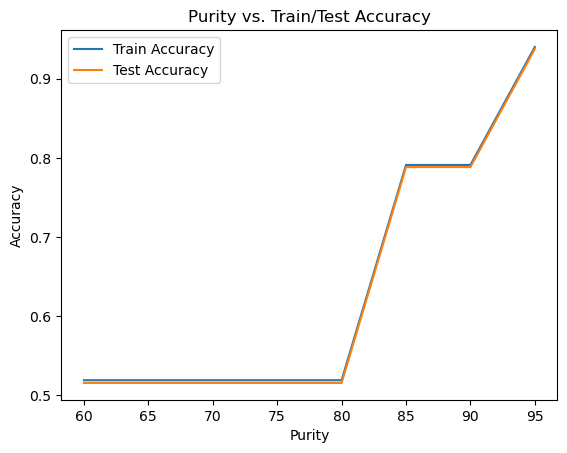

In [28]:
# Calling this above function with your train and test data and the optimal size obtained from 2 steps back
plot_purity_vs_accuracy(train.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, :-1], test.iloc[:, -1], optimal_size=best_model.min_samples_split)

### For the optimal value of purity, plot size vs. train/test accuracy curves

In [29]:
def plot_size_vs_accuracy(train_X, train_y, test_X, test_y, optimal_purity):
    size_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    train_accuracies = []
    test_accuracies = []

    for size in size_values:
        clf = DecisionTreeClassifier(min_samples_split=size, min_impurity_decrease=(100 - optimal_purity) / 100)
        clf.fit(train_X, train_y)
        train_accuracy = clf.score(train_X, train_y)
        test_accuracy = clf.score(test_X, test_y)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    plt.plot(size_values, train_accuracies, label='Train Accuracy')
    plt.plot(size_values, test_accuracies, label='Test Accuracy')
    plt.xlabel('Size')
    plt.ylabel('Accuracy')
    plt.title('Size vs. Train/Test Accuracy')
    plt.legend()
    plt.show()


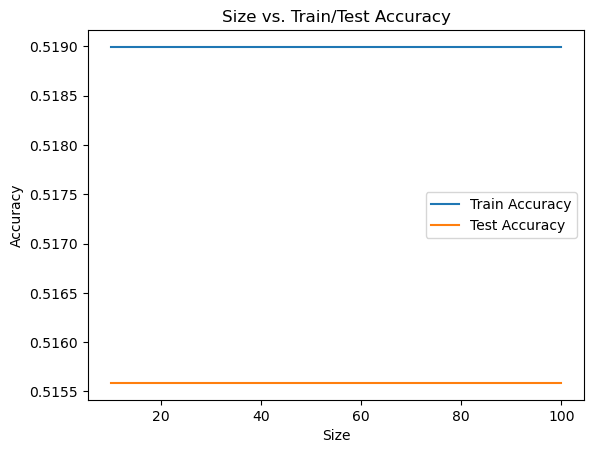

In [30]:
# Calling this above function with your train and test data and the optimal purity obtained previously
plot_size_vs_accuracy(train.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, :-1], test.iloc[:, -1], optimal_purity=best_model.min_impurity_decrease)